In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCC-Melo/ImagesGerador/KFCV.CSV', sep=';')

In [ ]:
df.head()

,params,pred,model
0,14.3,79.89,DenseNet169
1,20.2,79.30,DenseNet201
2,9.2,78.16,EfficientNetB2
3,5.3,77.54,EfficientNetB0
4,8.0,77.03,DenseNet121


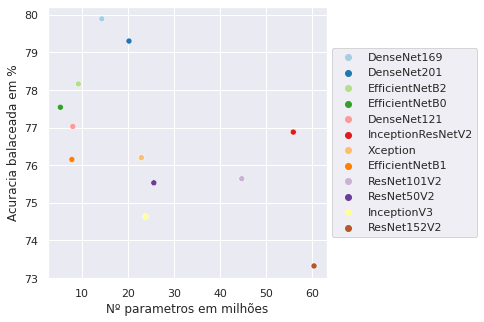

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
g = sns.scatterplot(x="params", y="pred", hue="model", data=df,palette='Paired', ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Nº parametros em milhões')
plt.ylabel('Acuracia balaceada em %')
fig = g.get_figure()
fig.savefig('/content/drive/MyDrive/TCC-Melo/ImagesGerador/KFCV_result.png')

In [1]:
# Ordem das categorias
classes = ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
#         [0      , 1    , 2    , 3   , 4    , 5   , 6]


In [2]:
!pip install -U git+https://github.com/keisen/tf-keras-vis.git@4a90becb02ed3d44825300fcb807dd58157787ba

  Cloning https://github.com/keisen/tf-keras-vis.git (to revision 4a90becb02ed3d44825300fcb807dd58157787ba) to /tmp/pip-req-build-4p37h32_
  Running command git clone -q https://github.com/keisen/tf-keras-vis.git /tmp/pip-req-build-4p37h32_
  Running command git rev-parse -q --verify 'sha^4a90becb02ed3d44825300fcb807dd58157787ba'
  Running command git fetch -q https://github.com/keisen/tf-keras-vis.git 4a90becb02ed3d44825300fcb807dd58157787ba
  Running command git checkout -q 4a90becb02ed3d44825300fcb807dd58157787ba


In [36]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, GlobalAveragePooling2D, Input, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, Precision, Recall
from tensorflow import keras

import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score

import mlxtend
from mlxtend.plotting import plot_confusion_matrix

import itertools
import os
from os import walk
import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
num_model = 1

In [10]:
if num_model in [1, 2, 3]:
    camada_reescal = tf.keras.applications.densenet.preprocess_input
elif num_model in [4, 5, 6]:
    camada_reescal = tf.keras.applications.resnet_v2.preprocess_input
elif num_model == 7:
    camada_reescal = tf.keras.applications.xception.preprocess_input
elif num_model == 8:
    camada_reescal = tf.keras.applications.inception_v3.preprocess_input
elif num_model == 9:
    camada_reescal = tf.keras.applications.inception_resnet_v2.preprocess_input
elif num_model in [10, 11, 12]:
    camada_reescal = tf.keras.applications.efficientnet.preprocess_input
    
print(f'A camada selecionada foi {camada_reescal}')

A camada selecionada foi <function preprocess_input at 0x7fb2cc273560>


In [37]:
conv_base = tf.keras.applications.MobileNetV3Small(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

input_width=450
input_height=450
inputs = tf.keras.Input(shape=(input_height, input_width, 3))

top_layer = Conv2D(filters=3, kernel_size=3, strides=1)(inputs)
top_layer = MaxPool2D(pool_size=(2, 2))(top_layer)

x = conv_base(top_layer, training=False)
x = GlobalAveragePooling2D()(x)
#x = layers.Dropout(0.2)(x)

outputs = Dense(1)(x)
outputs = Activation("sigmoid")(outputs)

model = Model(inputs, outputs)

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 450, 450, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 448, 448, 3)       84        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 224, 224, 3)       0         
_________________________________________________________________
MobilenetV3small (Functional (None, 1, 1, 1024)        1529968   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
_________________________________________________________________
activation (Activation)      (None, 1)                 0     

In [13]:
save_dir = '/content/drive/MyDrive/TCC-Melo/Kaggle/Modelos_checkPoint_val_test/'
nomeDoModelo = 'DenseNet121'
model = tf.keras.models.load_model(save_dir + str(nomeDoModelo) + '.h5')

In [28]:
model.summary()

Model: "DenseNet121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, 448, 448, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 448, 448, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 448, 448, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 448, 448, 3)       0         
_________________________________________________________________
densenet121 (Functional)     (None, 14, 14, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              

In [23]:
test_img = tf.keras.utils.img_to_array(tf.keras.utils.load_img("/content/drive/MyDrive/TCC-Melo/ImagesGerador/val_mel_1.jpg" , target_size=(448,448)))
test_img_final = camada_reescal(test_img)
test_img_final = np.expand_dims(test_img_final, axis=0)

In [25]:
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import num_of_gpus
from tf_keras_vis.utils.scores import CategoricalScore
# Create ScoreCAM object
scorecam = Scorecam(model)

score = CategoricalScore([5])
# Generate heatmap with ScoreCAM
cam = scorecam(score, test_img_final, penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

ValueError: ignored